# MDP assignment

First of all I am running the primary code and visualize the average_cumulative_reward in order to see that what happens in this algorithm.

After that I will add the described things in the description of the assignment and check the effect and the improvement of each change.

In [1]:
def running_average(nums):
    result = []
    sum_so_far = 0
    for i, num in enumerate(nums):
        sum_so_far += num
        result.append(sum_so_far / (i + 1))
    return result

In [11]:
import random

from ice import *
import matplotlib.pyplot as plt
import numpy as np

def average_cumulative_reward_visualization(average_cumulative_rewards, timesteps):
    window_size = 1000
    windowed_rewards = [np.mean(average_cumulative_rewards[i:i+window_size])
                        for i in range(0, len(average_cumulative_rewards), window_size)]
    plt.plot(windowed_rewards)
    plt.xlabel('Time')
    plt.ylabel('Average cumulative reward')
    plt.title('Average cumulative reward ' + str(timesteps) + " EPISODES")
    plt.yticks(np.arange(0, max(windowed_rewards), 5))
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.show()

In [12]:
def average_of_average_cumulative_reward_visualization(average_cumulative_rewards, timesteps):
    x = running_average(average_cumulative_rewards)
    plt.plot(running_average(x))
    plt.xlabel('Time')
    plt.ylabel('Average cumulative reward')
    plt.title('Average of average cumulative reward ' + str(timesteps) + " EPISODES until each episod")
    plt.yticks(np.arange(0, max(x), 5))
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.show()

## Primary code
This code is the primary code provided in the assignment. Let see what happens.

0 -10.0 -0.5
10000 100.0 25.983389338321487
20000 -10.0 28.208808476567246
30000 100.0 27.157563581070434
40000 -10.0 15.514502419699102
50000 -10.0 24.179136555152255
60000 -10.0 12.942133321097577
70000 100.0 28.858754516945076
80000 100.0 26.71151041105892
90000 100.0 27.931959601383646
0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 


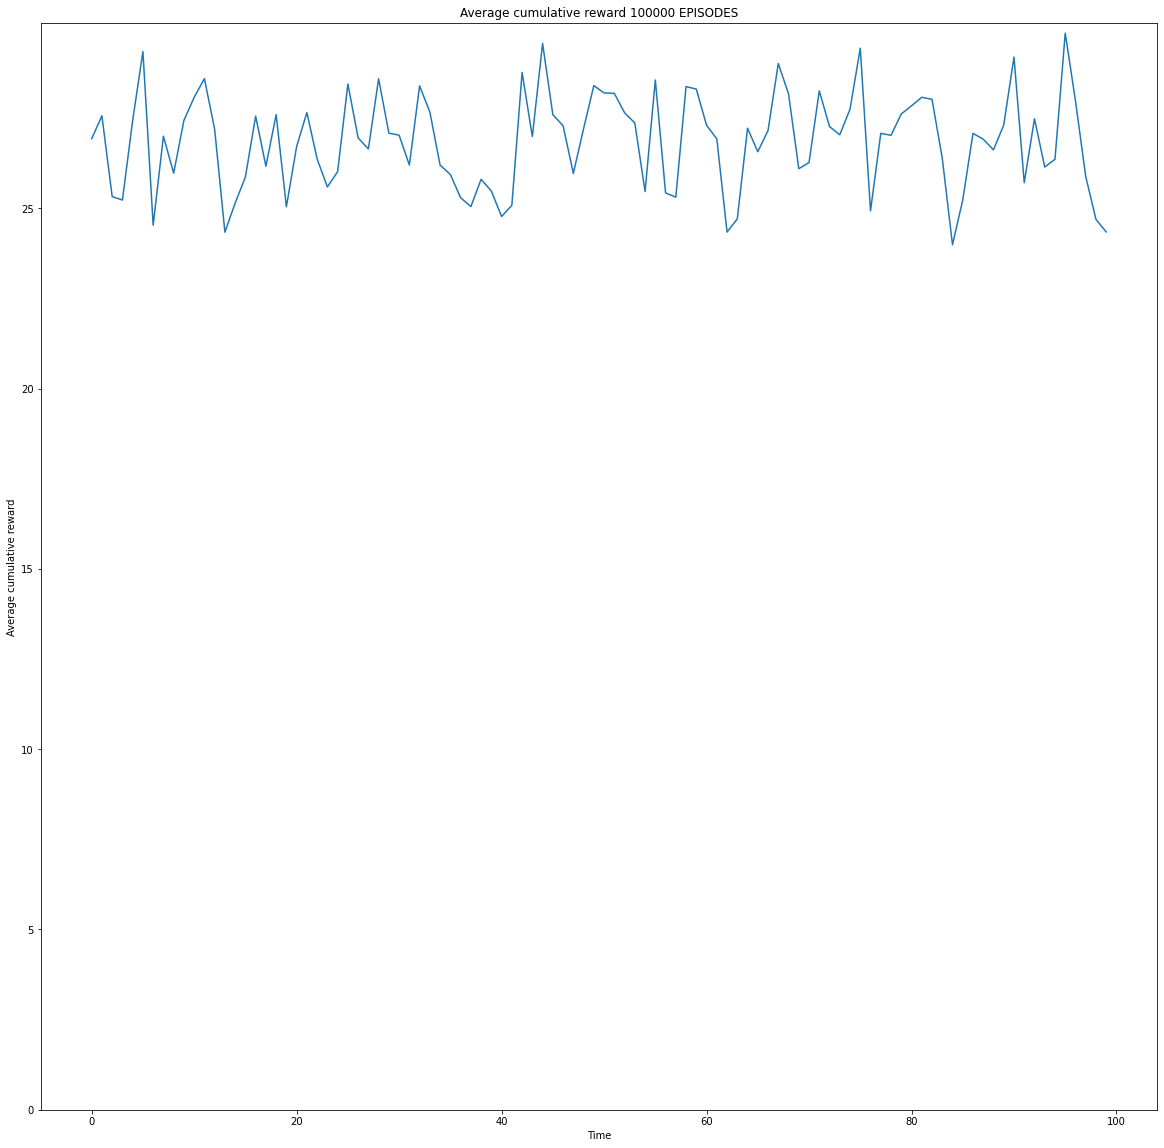

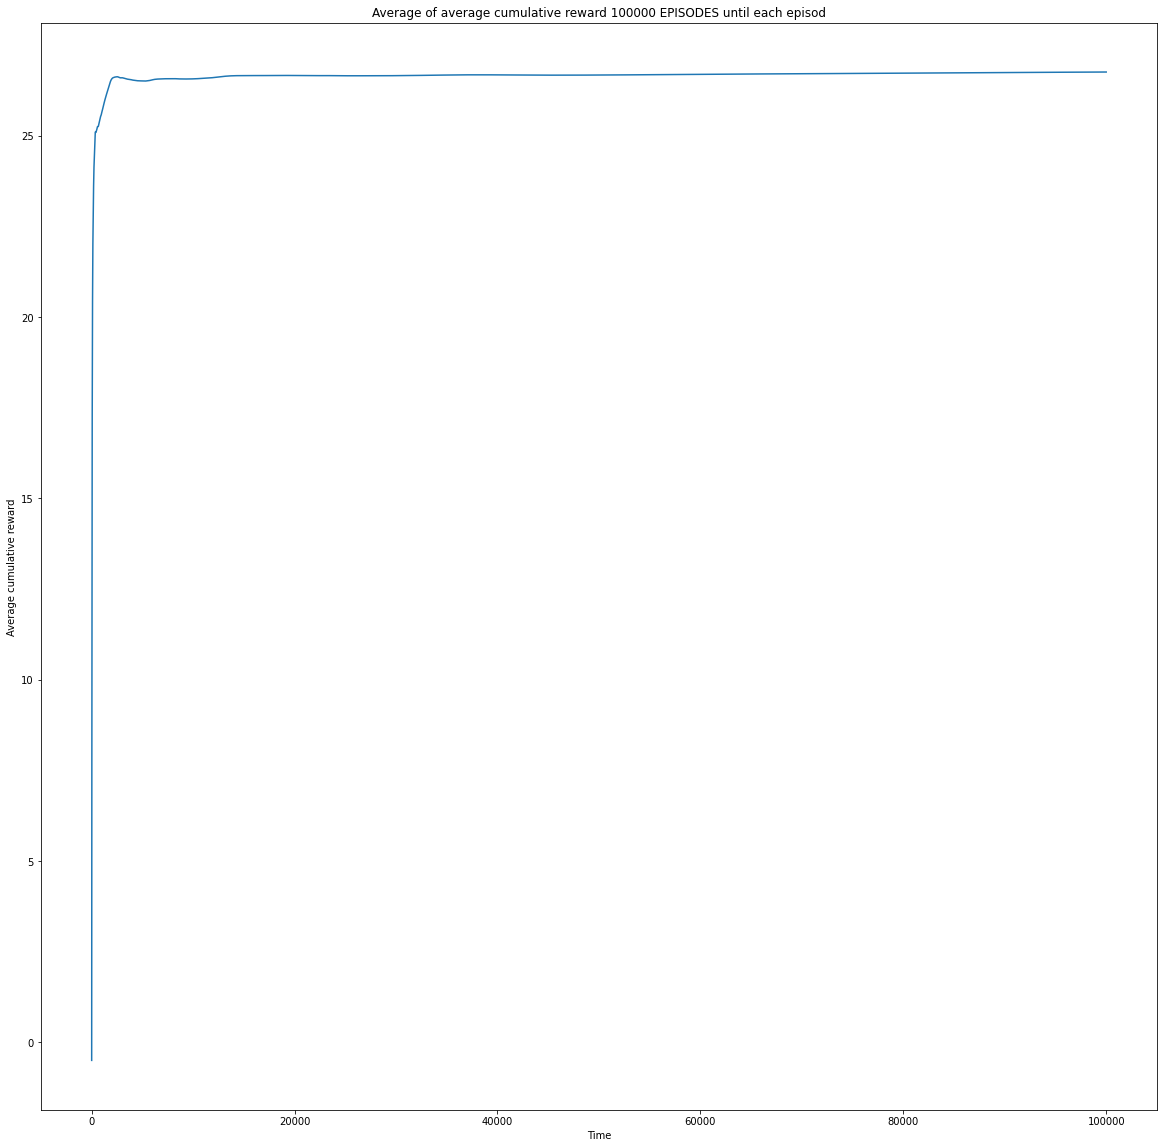

In [13]:
from ice import *
EPISODES = 100000
EPSILON = 0.1
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0
    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]
    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0
        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            a = 0
            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)
            # Perform the action
            next_state, r, terminate = env.step(a)
            # Update the Q-Table
            qtable[state][a] = 0.0
            # Update statistics
            cumulative_reward += r
            state = next_state
        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i%(EPISODES/10) == 0:
            print(i, cumulative_reward, average_cumulative_reward)
    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')
        print()
    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
if __name__ == '__main__':
    main()

As you can see there is no sign of learning and because there is not any. I also implemented a function for ploting. In this function we average every 1000 point and show them in order to have a more clear plot.
## Add Q learning

0 -10.0 -0.5 0.1
10000 100.0 89.09462398854957 0.1
20000 100.0 86.47647842209874 0.1
30000 100.0 85.29678212906015 0.1
40000 100.0 87.25015745823717 0.1
50000 100.0 95.14890420910311 0.1
60000 120.0 92.6066406395792 0.1
70000 120.0 98.31055939129786 0.1
80000 100.0 80.45455686500311 0.1
90000 100.0 94.35302217612622 0.1
83.780 91.284 100.000 0.000 
73.507 0.000 90.000 0.000 
66.545 60.171 81.668 0.000 
60.663 0.000 0.000 0.000 


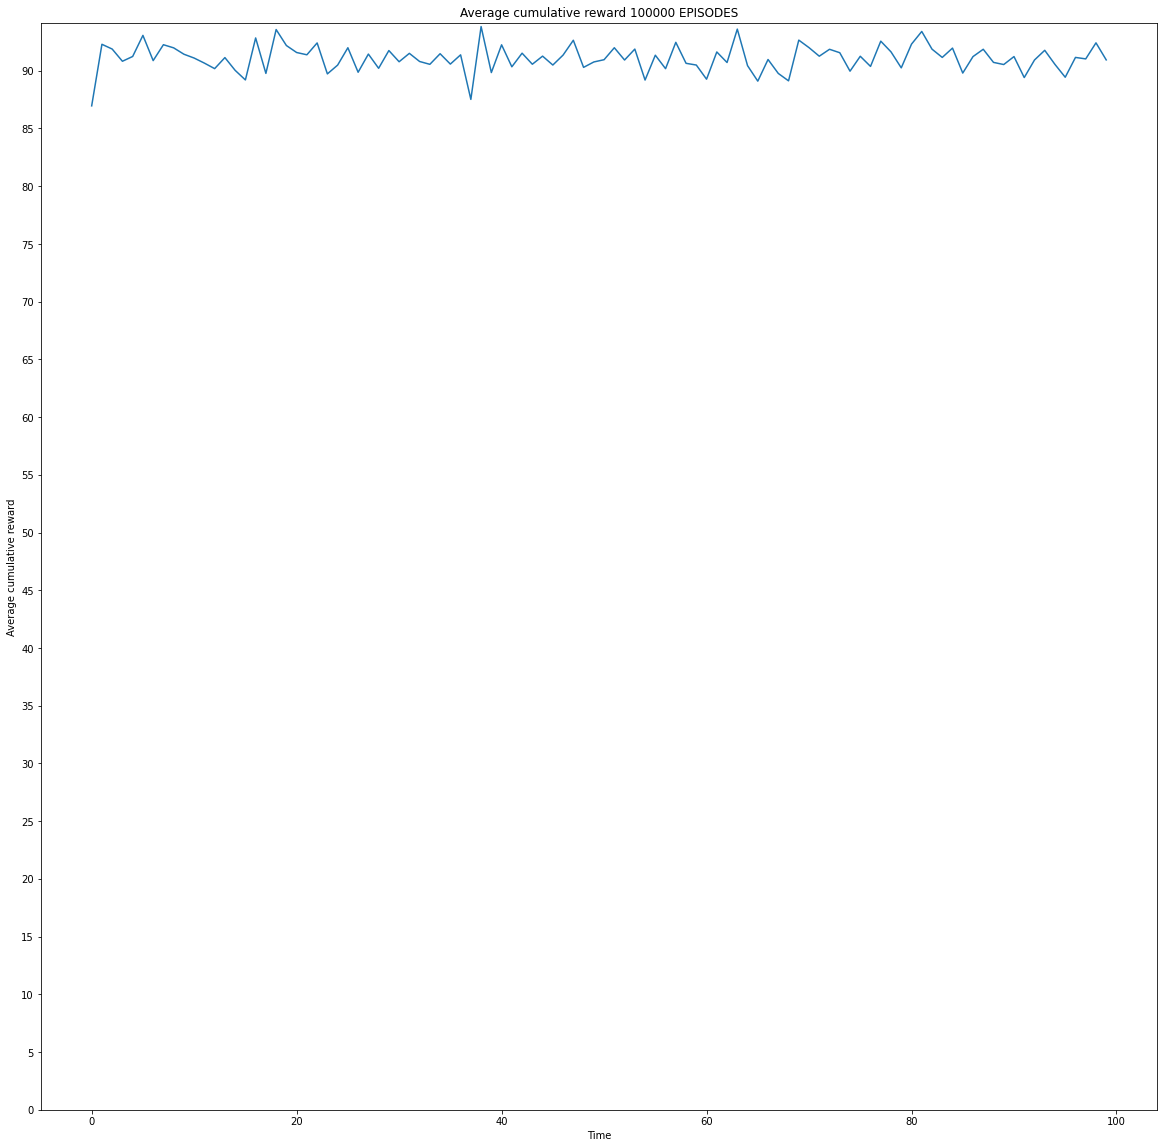

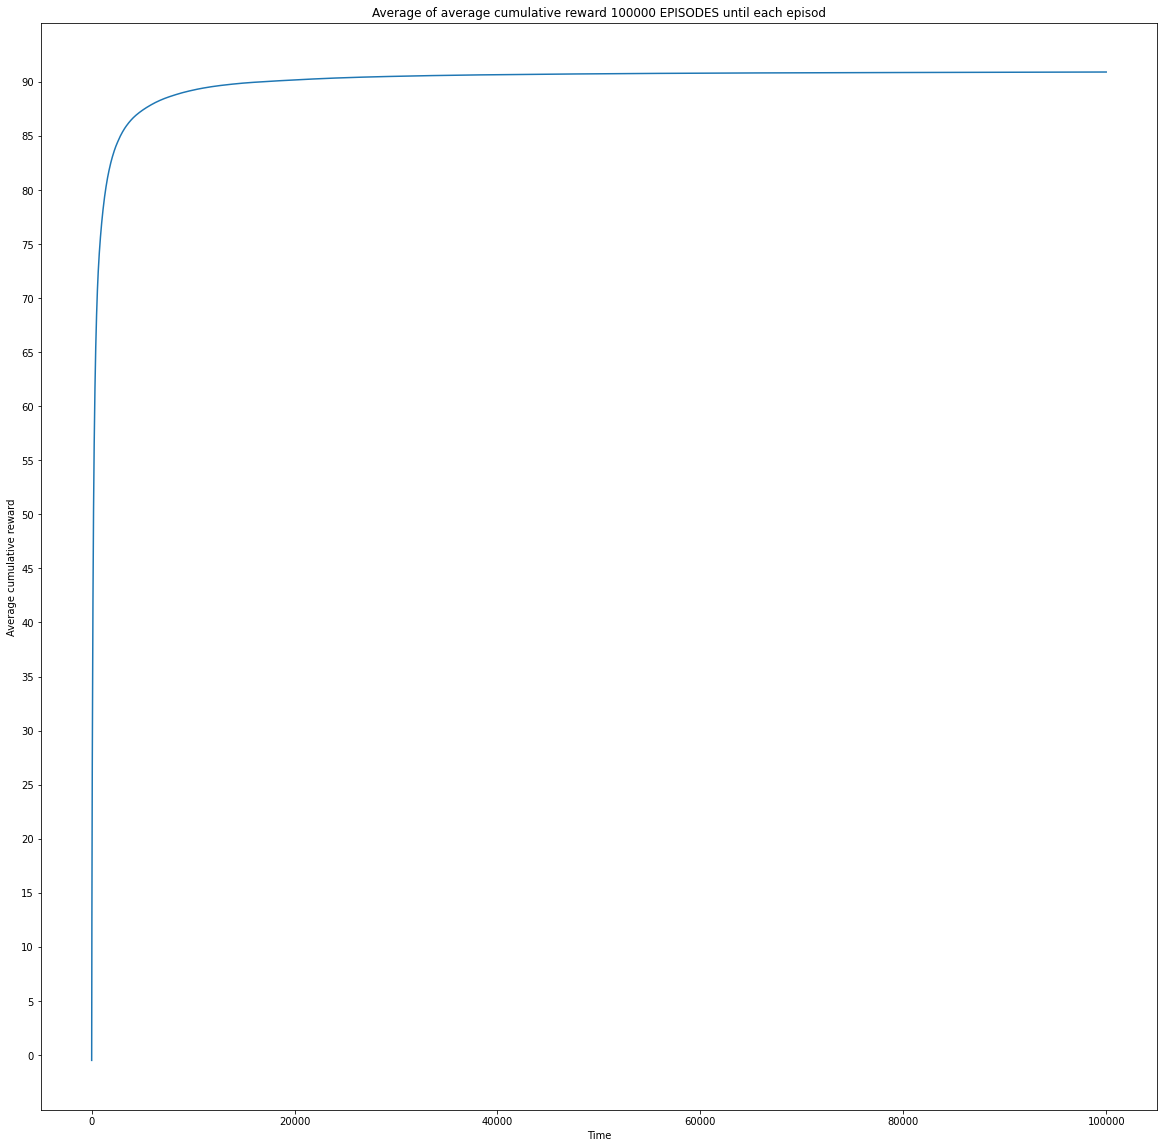

In [14]:
EPISODES = 100000
EPSILON = 0.1
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 10) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    
if __name__ == '__main__':
    main()


This one is looking better with higher values but because epsilon is very small and does not change the learning is not visible in the plot and also its limited.
## Add Epsilon decay
In this part I applied the epsilon decay with DECAY = 0.9999, min_EPSILON = 0.1 and primary EPSILON = 1. 

0 -10.0 -0.5 0.9999
10000 -10.0 62.59279330352855 0.3678242603283259
20000 120.0 84.27321415762967 0.13530821730781062
30000 100.0 92.23425584062925 0.1
40000 100.0 90.93428557135756 0.1
50000 100.0 93.98845692962699 0.1
60000 100.0 87.87326522644378 0.1
70000 100.0 84.6263796954064 0.1
80000 70.0 81.31338057523452 0.1
90000 100.0 90.9661307823188 0.1
81.513 90.192 100.000 0.000 
73.832 0.000 90.000 0.000 
67.260 91.727 81.002 0.000 
61.050 0.000 0.000 0.000 


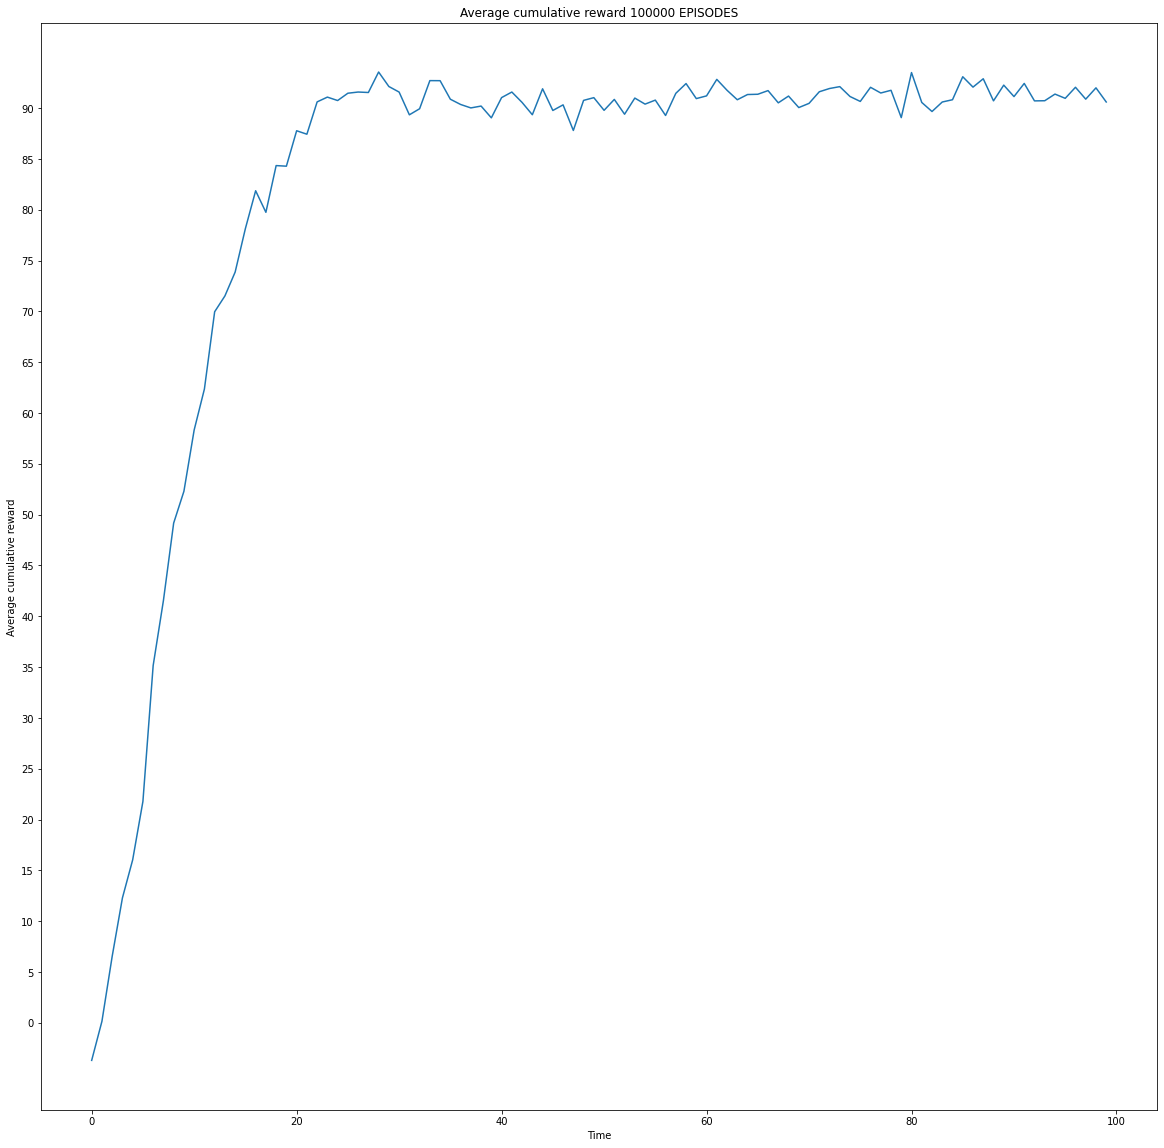

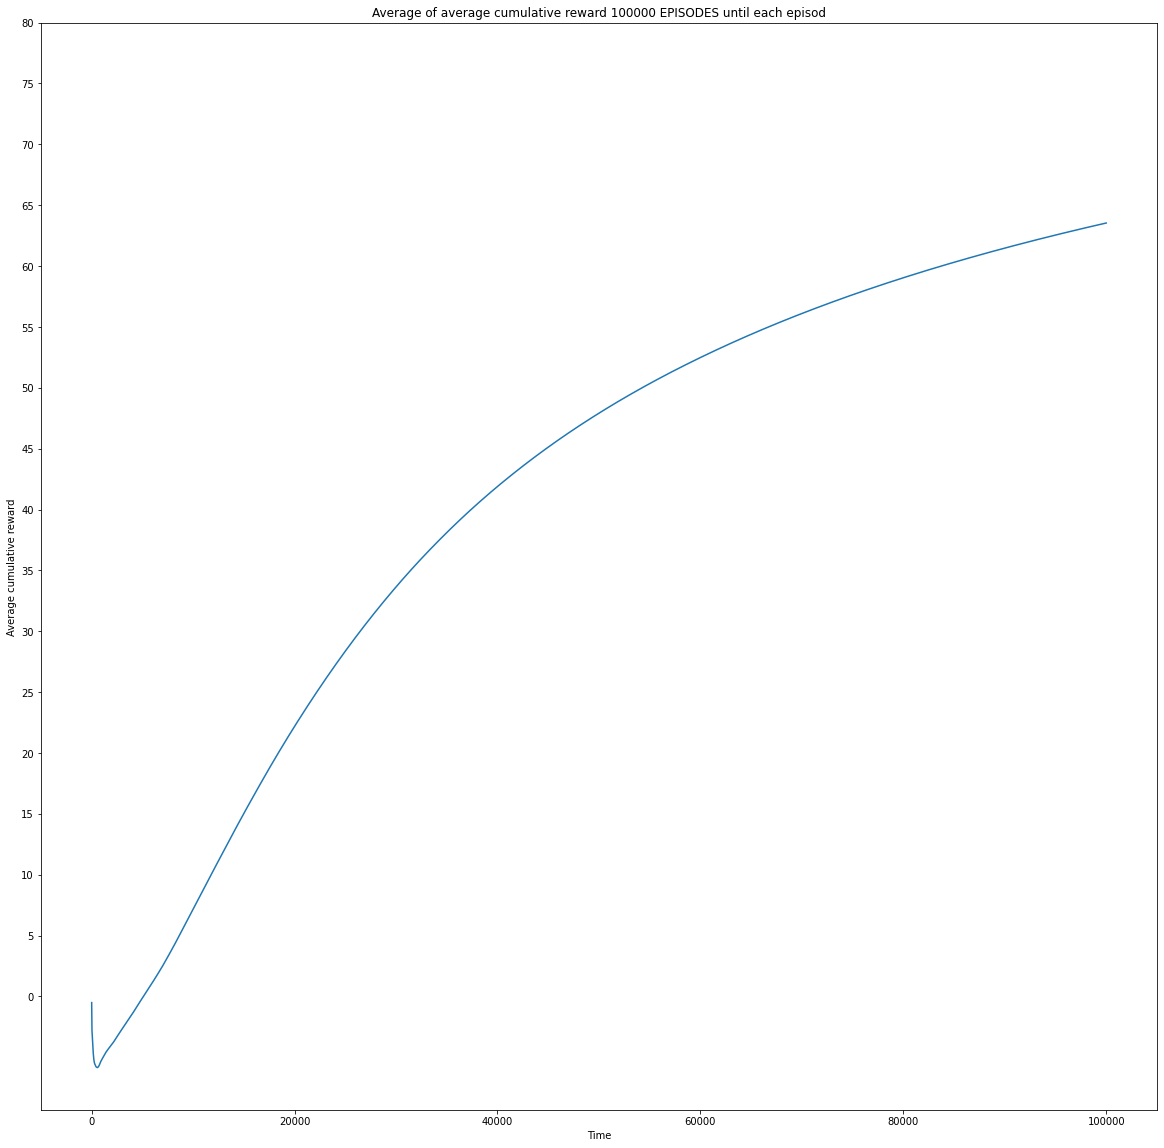

In [15]:
EPISODES = 100000
EPSILON = 1
min_EPSILON = 0.1
DECAY = 0.9999
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        global EPSILON
        EPSILON = max(min_EPSILON, EPSILON*DECAY)

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 10) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)

if __name__ == '__main__':
    main()


I also run the program for DECAY = 0.999999 and for 3000000 iteration and have the same results.

0 -10.0 -0.5 0.999999
30000 -10.0 -2.3245609059137826 0.9704445485454593
60000 -10.0 -5.700436830477639 0.941763563565167
90000 -10.0 -4.54907095581898 0.9139302302107998
120000 -10.0 -0.294481467240649 0.8869194965784752
150000 -10.0 6.0428814241566 0.8607070511603203
180000 -10.0 -5.052487140820837 0.8352693009624697
210000 -10.0 7.425383576730465 0.810583350269737
240000 -10.0 4.583608613746494 0.7866269800379648
270000 -10.0 -2.504724152562729 0.7633786278952455
300000 -10.0 2.2431297824007856 0.7408173687344279
330000 10.0 14.527637854228177 0.7189228958790044
360000 -10.0 17.085658739398827 0.6976755028057985
390000 -10.0 12.511336161470522 0.6770560654076723
420000 -10.0 19.892000174071676 0.6570460247805289
450000 100.0 21.085311799268602 0.6376273705190901
480000 -10.0 7.74761698998633 0.6187826245062464
510000 -10.0 21.687170133178597 0.6004948251815632
540000 100.0 34.544047605719186 0.582747512274721
570000 -10.0 21.892908184079594 0.5655247119901355
600000 100.0 15.6275522

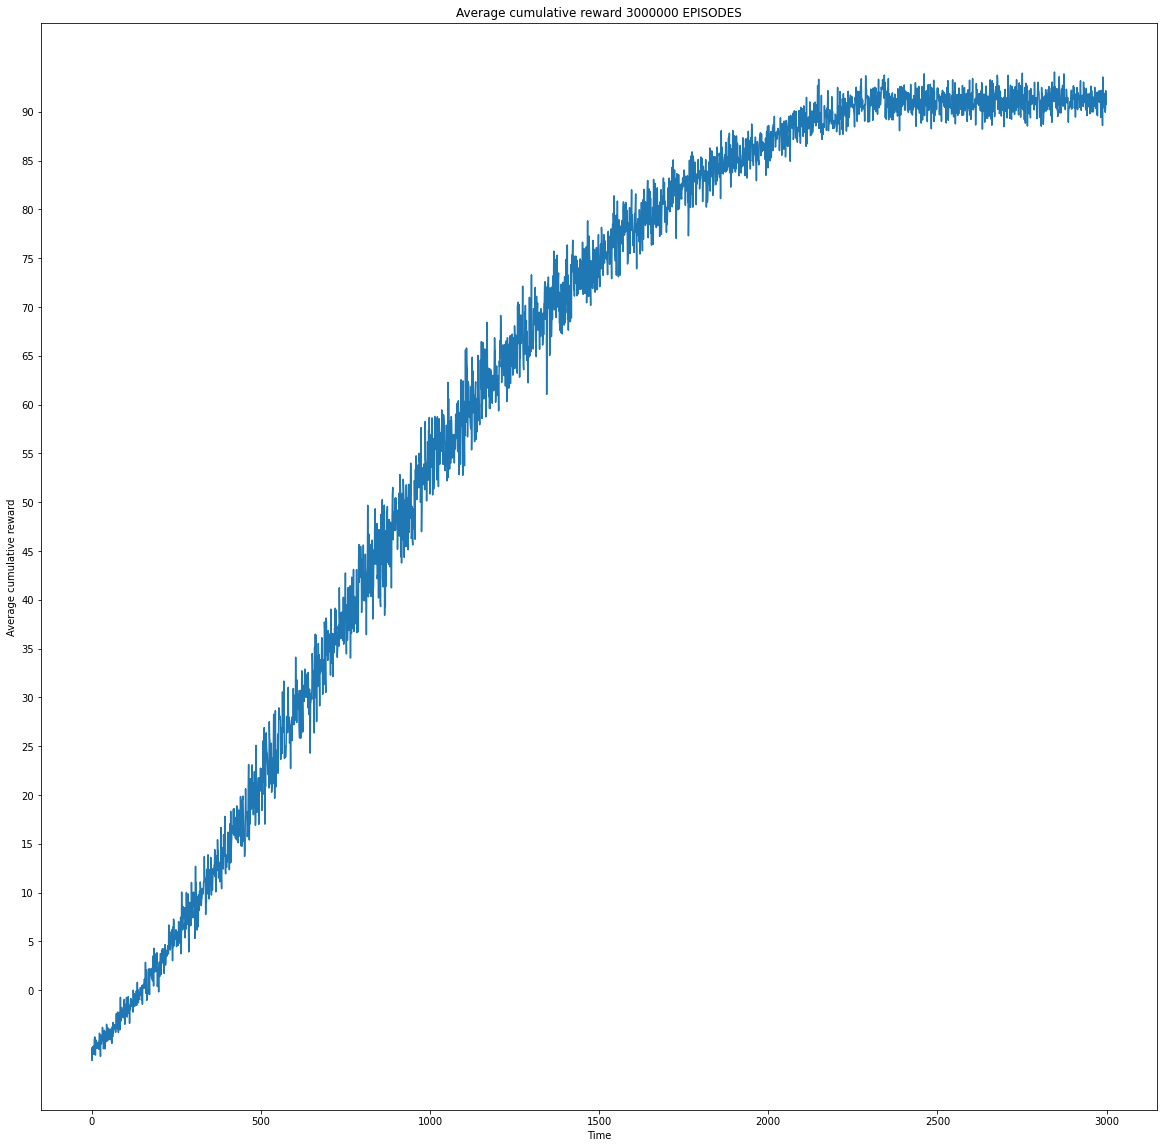

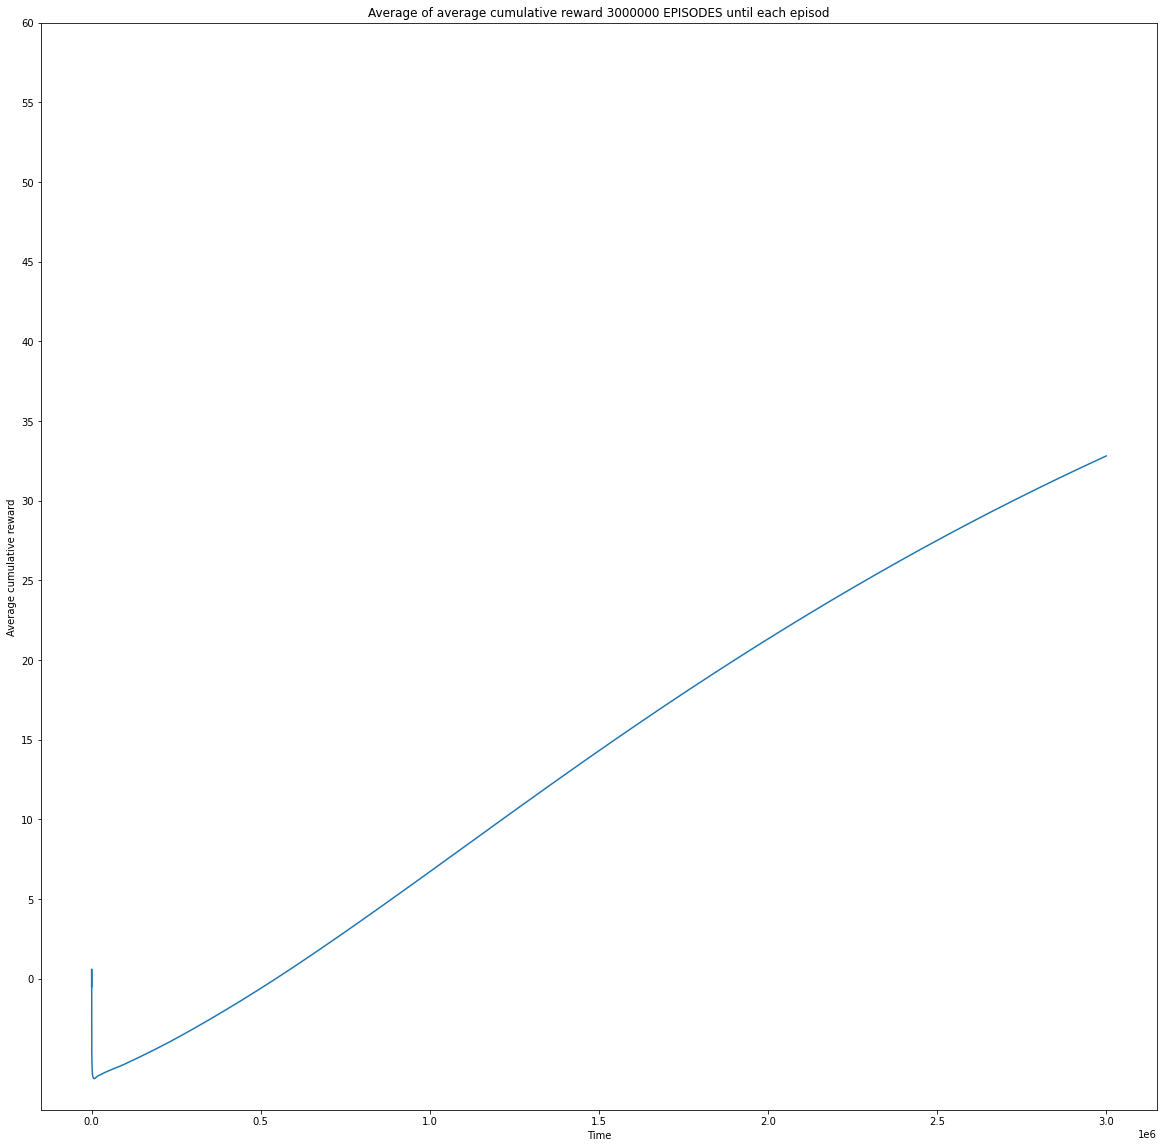

In [16]:
EPISODES = 3000000
EPSILON = 1
min_EPSILON = 0.1
DECAY = 0.999999
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        global EPSILON
        EPSILON = max(min_EPSILON, EPSILON*DECAY)

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 100) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)

if __name__ == '__main__':
    main()


## Conclusion
In conclusion, in my view, epsilon greedy in my view is very simple and works very well for this problem. Epsilon Decay also works very good and better in performance but in my view it is not necessary at all. In the following I also run the epsilon decay and epsilon greedy for a big number of generations but the results where the same.

0 -10.0 -0.5 0.9999999
200000 -10.0 -8.741821056266987 0.9801985743170336
400000 -10.0 -1.7126888953972066 0.9607893411720586
600000 -10.0 -2.795118933167259 0.9417644366122813
800000 30.0 -5.209369690553468 0.9231162504214226
1000000 -10.0 -4.406327825574534 0.9048373230756607
1200000 -10.0 -2.981880779873464 0.8869203427596255
1400000 -10.0 -7.429438620100973 0.8693581424415379
1600000 -10.0 -5.950903878571323 0.8521436970064615
1800000 10.0 -3.547228751561824 0.835270120445973
2000000 50.0 3.6601814439355245 0.818730663103786
2200000 -10.0 -1.8609520257996353 0.8025187089758151
2400000 -10.0 -4.306665316615627 0.7866277730635841
2600000 10.0 -0.09102152152118603 0.7710514987802367
2800000 -10.0 -2.6499636996852334 0.7557836554077564
3000000 30.0 -2.332278077655987 0.7408181356045965
3200000 10.0 -3.548049932439609 0.7261489529626811
3400000 -10.0 -3.2090920085250443 0.7117702396128426
3600000 -10.0 2.7991501451224368 0.6976762438773969
3800000 50.0 1.1886044877802708 0.6838613279695

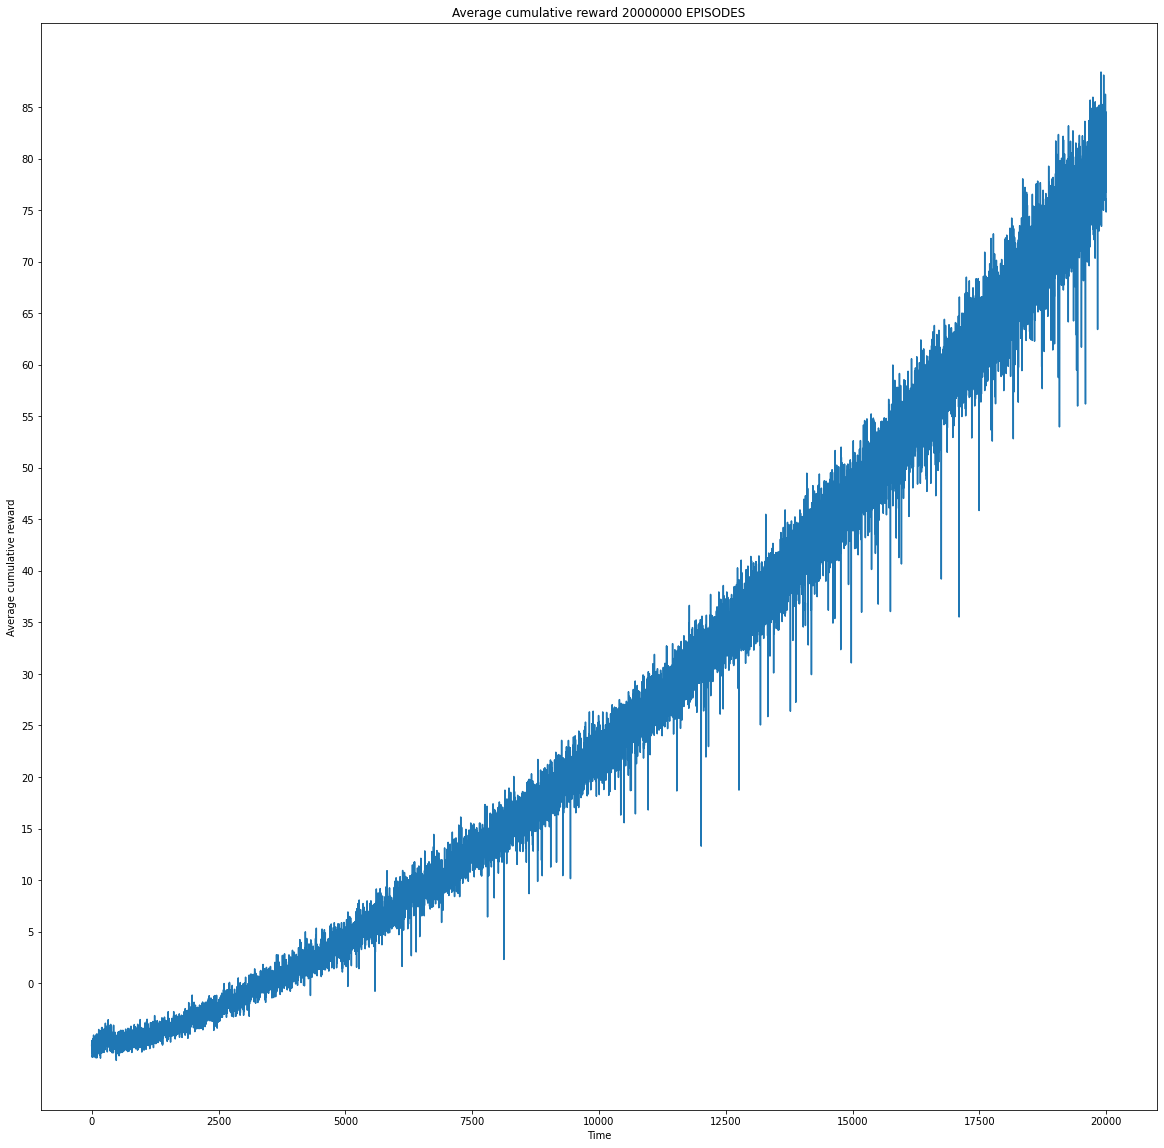

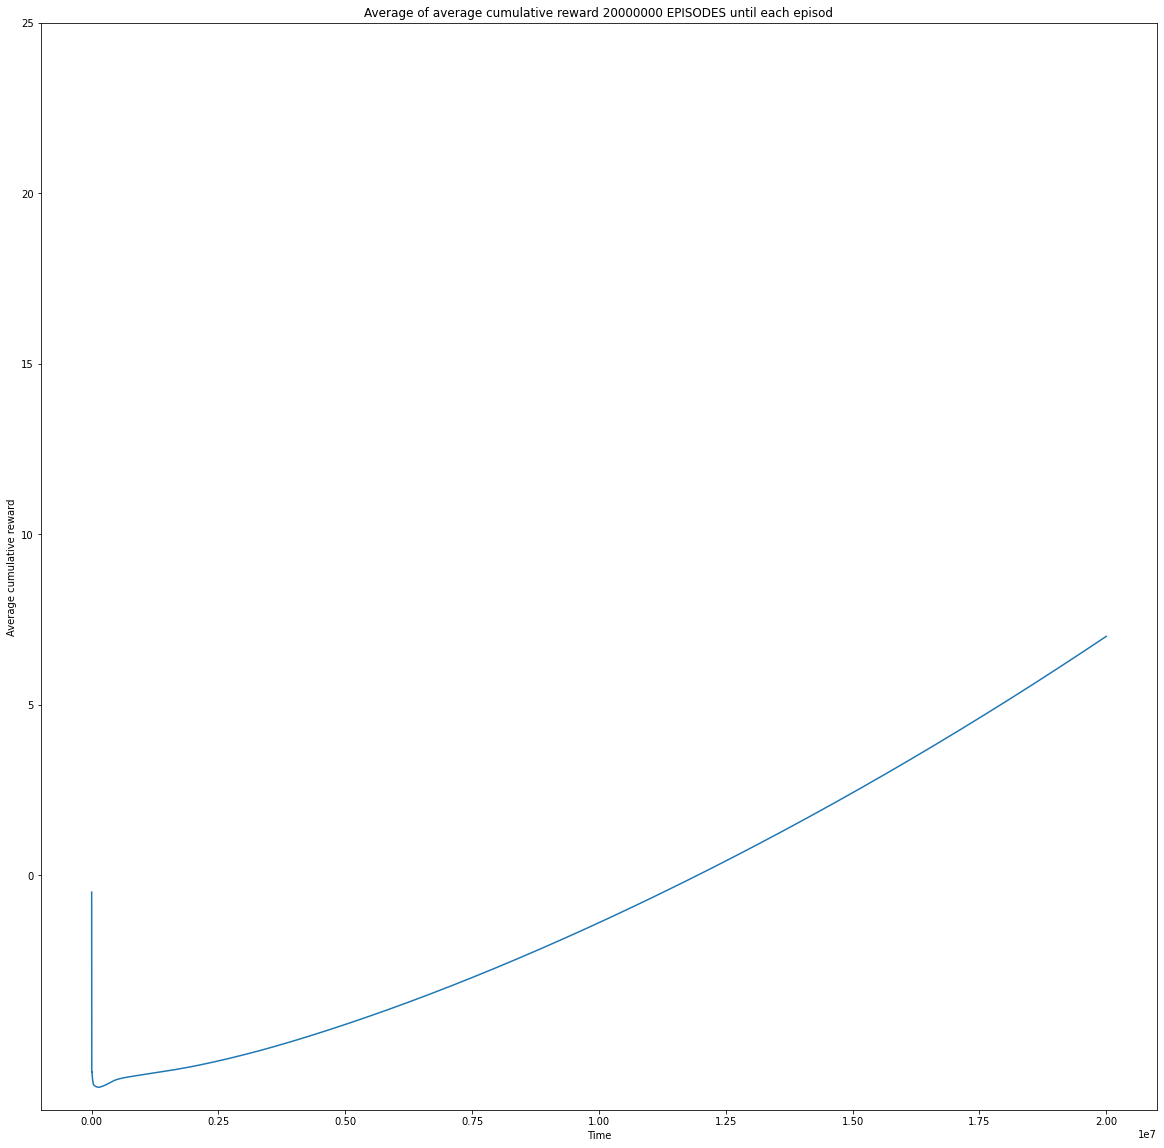

In [18]:
EPISODES = 20000000
EPSILON = 1
min_EPSILON = 0.1
DECAY = 0.9999999
GAMMA = 0.99
LEARNING_RATE = 0.001
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        global EPSILON
        EPSILON = max(min_EPSILON, EPSILON*DECAY)

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 100) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)

if __name__ == '__main__':
    main()



0 -10.0 -0.5 0.1
100000 100.0 103.93051730523926 0.1
200000 100.0 82.3716944674481 0.1
300000 100.0 75.84911605619274 0.1
400000 100.0 84.36126252120249 0.1
500000 100.0 92.99323637089128 0.1
600000 100.0 84.06193594881591 0.1
700000 100.0 91.92139547209658 0.1
800000 100.0 83.9574126650045 0.1
900000 100.0 88.20158706349126 0.1
1000000 100.0 88.8601078240861 0.1
1100000 100.0 94.82879829697912 0.1
1200000 100.0 95.67834379107987 0.1
1300000 -10.0 91.05615056332726 0.1
1400000 100.0 86.47257890005534 0.1
1500000 100.0 86.9800919254992 0.1
1600000 100.0 95.87521627591029 0.1
1700000 100.0 85.98917024295888 0.1
1800000 100.0 95.1537609595085 0.1
1900000 100.0 92.45328200365343 0.1
2000000 100.0 87.28583602960316 0.1
2100000 100.0 95.90722381074721 0.1
2200000 10.0 94.50537337928436 0.1
2300000 100.0 90.46593566269306 0.1
2400000 -10.0 75.42467321541909 0.1
2500000 100.0 88.20681249513096 0.1
2600000 100.0 95.64305920271619 0.1
2700000 -10.0 85.6146865126558 0.1
2800000 100.0 74.354075857

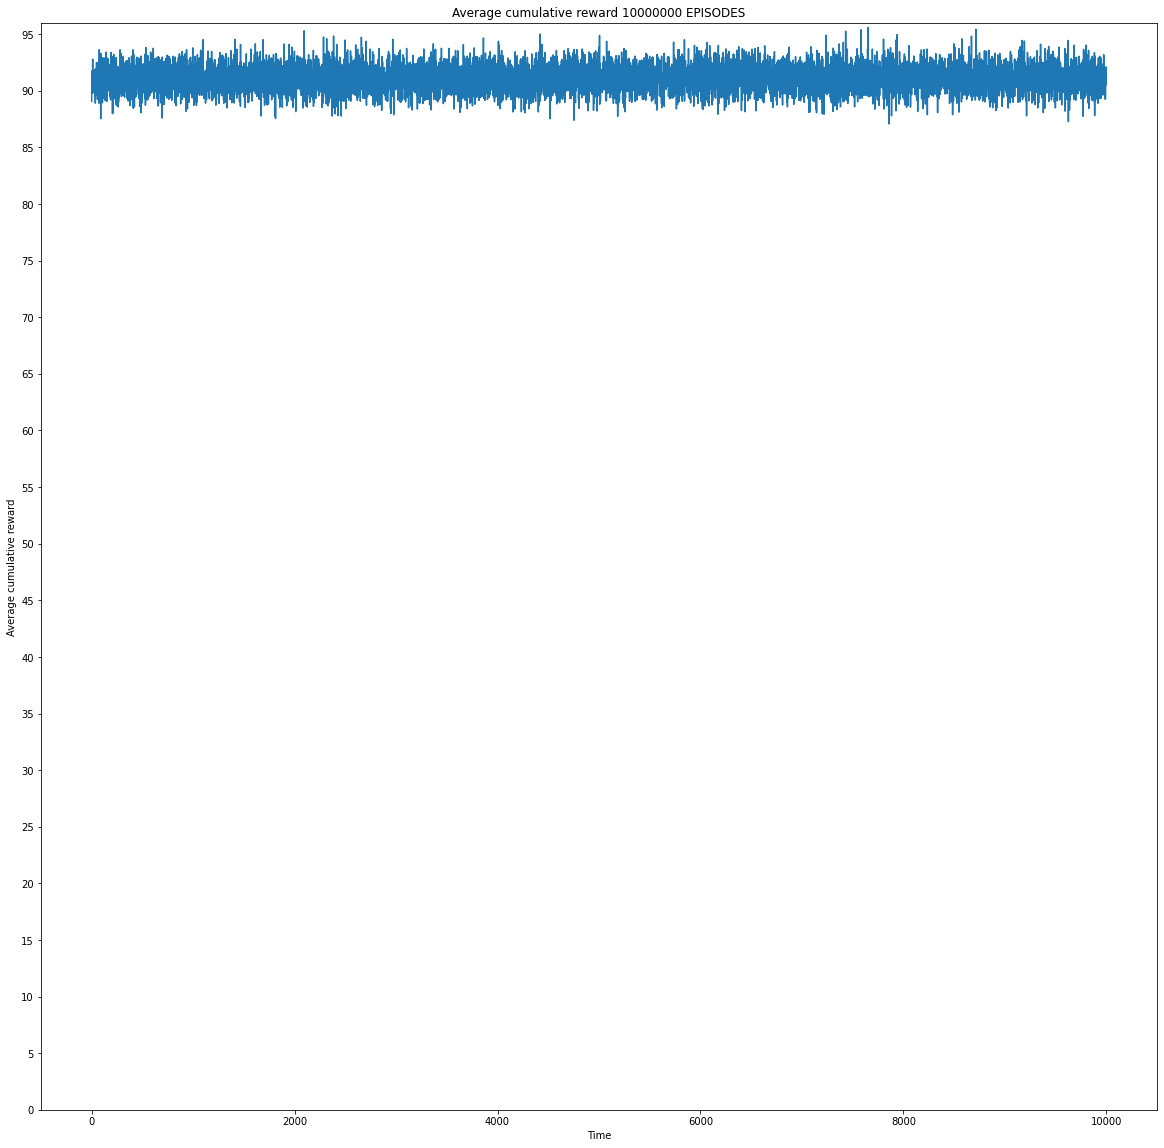

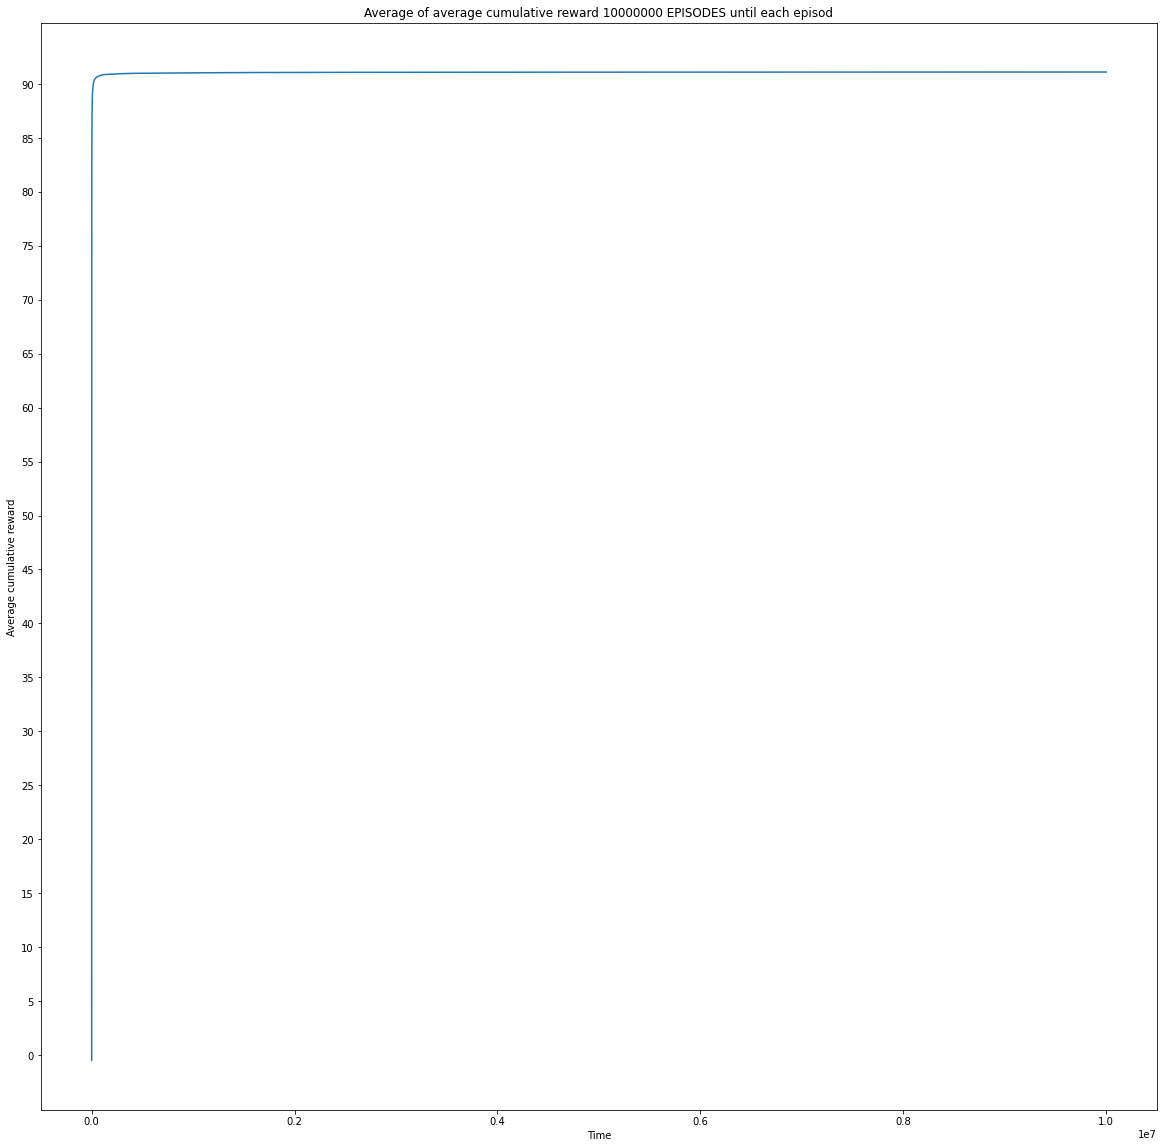

In [21]:
EPISODES = 10000000
EPSILON = 0.1
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 100) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    
if __name__ == '__main__':
    main()

